In [1]:
import matplotlib.pyplot as plt 

import numpy as np # linear algebra
import pandas as pd #data processing

from sklearn.model_selection import train_test_split

import os
import re
import nltk
nltk.download()
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression# Logistic Regression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
! gdown --id 1r-gBzfjk8AIs_HHPlfmZqeAJFIczEQ9G


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_data...
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Un


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1r-gBzfjk8AIs_HHPlfmZqeAJFIczEQ9G
To: /content/fake_real_final_dataset.csv
100% 1.88M/1.88M [00:00<00:00, 202MB/s]


In [2]:


df = pd.read_csv('fake_real_final_dataset.csv')
df


,Unnamed: 0,title,label
0,0,"Dancing With The Stars 2018 Cast News, Tour an...",REAL
1,1,Amal Clooney displays her post-baby body in ti...,FAKE
2,2,Black Eyed Peas' Taboo claims Fergie turned do...,REAL
3,3,Pregnant Beyonce & Jay Z Jet Off To Bora Bora ...,REAL
4,4,Clint Eastwood Leaves His Estate To The Trump ...,FAKE
...,...,...,...
23191,23191,John Cena Plays His Entire Family (And Slimes ...,REAL
23192,23192,Chloe Moretz steps out in sharp outfit and 'f*...,REAL
23193,23193,‘NASA Confirms’ 15 Days Of Darkness Coming Thi...,FAKE
23194,23194,Paris Hilton's Happy It Girls Like Kendall Jen...,REAL


In [3]:
train, test = train_test_split(df, test_size=0.3)
train

,Unnamed: 0,title,label
19226,19226,Jennifer Aniston holds hands with Justin Thero...,FAKE
22785,22785,Leaving Jennifer Aniston for Angelina Jolie wa...,FAKE
16661,16661,Newlyweds Pippa Middleton and James Matthews s...,REAL
21864,21864,Cardi B hides figure in voluminous frilly dres...,REAL
7341,7341,Portia de Rossi says Steven Seagal 'unzipped h...,REAL
...,...,...,...
17599,17599,Jennifer Aniston: Why She’s Looking For A Much...,FAKE
15979,15979,Amal Clooney Is Inspired by Parkland Survivors...,REAL
8380,8380,Blake Shelton's 'Sexiest Man Alive' title ange...,FAKE
3311,3311,Keith Urban & Sophie Monk: Why Nicole is furious,FAKE


In [4]:
print(train.shape, test.shape)

(16237, 3) (6959, 3)


In [5]:
print(train.isnull().sum())
print('************')
print(test.isnull().sum())

Unnamed: 0    0
title         0
label         0
dtype: int64
************
Unnamed: 0    0
title         0
label         0
dtype: int64


label
FAKE     5755
REAL    17441
Name: title, dtype: int64


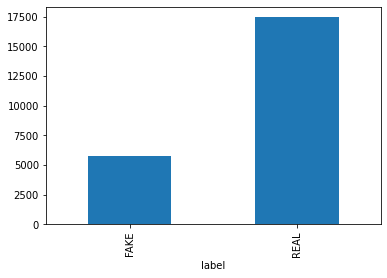

In [6]:
print(df.groupby(['label'])['title'].count())
df.groupby(['label'])['title'].count().plot(kind='bar')
plt.show()

In [7]:
stop_words = stopwords.words('english')
lemmatizer=WordNetLemmatizer()
for index,row in train.iterrows():
    filter_sentence = ''
    
    sentence = row['title']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    
    words = nltk.word_tokenize(sentence) #tokenization

    #print(words)
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    train.loc[index,'title'] = filter_sentence


In [8]:
train = train[['title','label']]

In [9]:
print(train)
X_train = train['title']
Y_train = train['label']

                                                   title label
19226   jennifer aniston hold hand justin theroux nyc...  FAKE
22785   leaving jennifer aniston angelina jolie one b...  FAKE
16661   newlyweds pippa middleton james matthews seen...  REAL
21864   cardi b hide figure voluminous frilly dress a...  REAL
7341    portia de rossi say steven seagal unzipped le...  REAL
...                                                  ...   ...
17599   jennifer aniston why shes looking for a much ...  FAKE
15979   amal clooney is inspired parkland survivors w...  REAL
8380    blake sheltons sexiest man alive title anger ...  FAKE
3311          keith urban sophie monk why nicole furious  FAKE
4126      fda announced that vaccines are causing autism  FAKE

[16237 rows x 2 columns]


In [10]:
#Feature extraction using count vectorization and tfidf.
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.transform(freq_term_matrix)


In [11]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in iter.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [12]:
test_counts = count_vectorizer.transform(test['title'].values)
test_tfidf = tfidf.transform(test_counts)

#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0)
print(X_train.shape,X_test.shape)

(12177, 16830) (4060, 16830)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic classifier on training set: 0.99
Accuracy of Logistic classifier on test set: 0.80


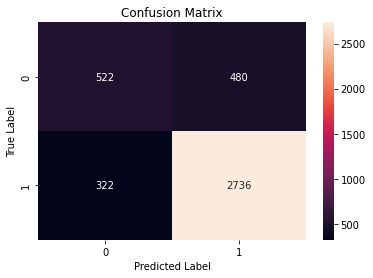

Precision: 0.618 / Recall: 0.521 / F1-Score: 0.566 / Accuracy: 0.802


In [13]:
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
print('Accuracy of Logistic classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

# cm = confusion_matrix(y_test, pred)
import seaborn as sns
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cms = confusion_matrix(y_test, pred)
class_label = [0,1]
df_cm = pd.DataFrame(cms, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
precision, recall, fscore, train_support = score(y_test, pred, pos_label="FAKE", average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,pred), 3)))

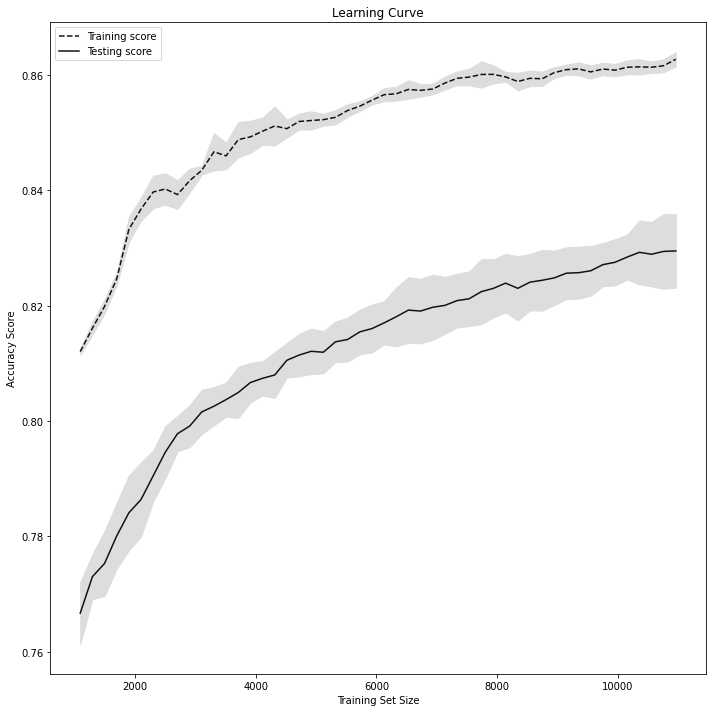

In [14]:
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Testing score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Accuracy of NB  classifier on training set: 0.84
Accuracy of NB classifier on test set: 0.81


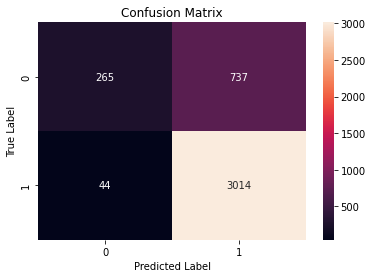

Precision: 0.858 / Recall: 0.264 / F1-Score: 0.404 / Accuracy: 0.808


In [15]:
NB = MultinomialNB()
NB.fit(X_train, y_train)
pred = NB.predict(X_test)
print('Accuracy of NB  classifier on training set: {:.2f}'
     .format(NB.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(X_test, y_test)))
# cm = confusion_matrix(y_test, pred)
# cm
import seaborn as sns
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cms = confusion_matrix(y_test, pred)
class_label = [0,1]
df_cm = pd.DataFrame(cms, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
precision, recall, fscore, train_support = score(y_test, pred, pos_label="FAKE", average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,pred), 3)))

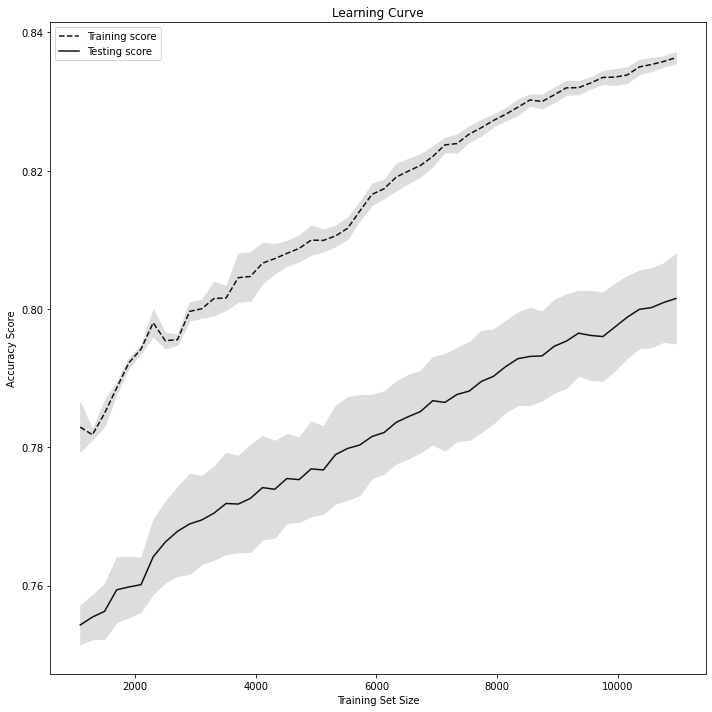

In [16]:
train_sizes, train_scores, test_scores = learning_curve(MultinomialNB(), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Testing score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Precision: 0.774 / Recall: 0.441 / F1-Score: 0.562 / Accuracy: 0.83


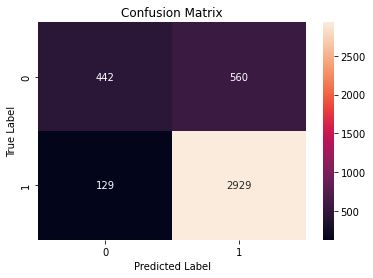

In [17]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs

rf = RandomForestClassifier(n_estimators=100, max_depth=None, n_jobs=-1)

rf_model = rf.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label="FAKE", average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))

import seaborn as sns
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cms = confusion_matrix(y_test, y_pred)
class_label = [0,1]
df_cm = pd.DataFrame(cms, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

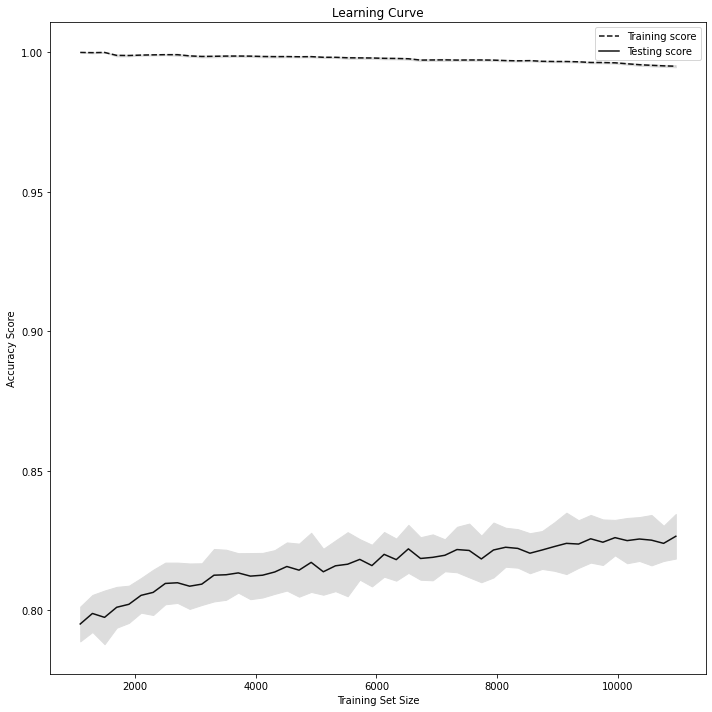

In [18]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(n_estimators=100), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Testing score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [19]:
X_train = train['title']
Y_train = train['label']

In [20]:
from sklearn.pipeline import Pipeline
import joblib

from sklearn import linear_model

In [21]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(norm='l2')),
    ('clf', linear_model.LogisticRegression(C=1e5)),
])


In [22]:
pipeline.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0))])

In [23]:
pipeline.predict(["Selena Gomez's Mom unhappy About Bieber Romance"])

array(['FAKE'], dtype=object)

In [24]:
pipeline.predict(["Brad Pitt unConfident Work"])

array(['REAL'], dtype=object)

In [25]:
#saving the pipeline
filename = 'pipeline_final.sav'
joblib.dump(pipeline, filename)

['pipeline_final.sav']

In [26]:
loaded_model = joblib.load(filename)


In [27]:
result = loaded_model.predict(["‘Tormented’ Brad Pitt will only be allowed ‘to spend four hours with his children on Christmas Day’"])
print(result)

['FAKE']


In [28]:
result = loaded_model.predict(["Brad Pitt unConfident Work"])
print(result)

['REAL']
